# Prediction of Heart Disease

In this project, we build a Machine Learning (ML) model that is capable of predicting whether a person has heart disease or not, using the medical attributes of the person. Thus, we have a binary classification problem at hand and we solve it via supervised Machine Learning.

## Data

The dataset to train and test the model is taken from the `UC Irvine Machine Learning Repository`. We shall use the Cleveland dataset (https://archive.ics.uci.edu/dataset/45/heart+disease), which has the following medical attributes:

* `age`: age in years.
* `sex`: biological sex.
    * value 1 = male
    * value 0 = female
* `cp`: chest pain type.
    * value 1 = typical angina
    * value 2 = atypical angina
    * value 3 = non-anginal pain
    * value 4 = asymptomatic
* `trestbps`: resting blood pressure in mm Hg on admission to the hospital.
* `chol`: serum cholestoral in mg/dl.
* `fbs`: fasting blood sugar > 120 mg/dl.
    * value 1 = true
    * value 0 = false
* `restecg`: resting electrocardiographic results.
    * value 0 = normal
    * value 1 = having ST-T wave abnormality
    * value 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
* `thalach`: maximum heart rate achieved.
* `exang`: exercise induced angina.
    * value 1 = yes
    * value 0 = no
* `oldpeak`: ST depression induced by exercise relative to rest.
* `slope`: the slope of the peak exercise ST segment.
    * value 1 = upsloping
    * value 2 = flat
    * value 3 = downsloping
* `ca`: number of major vessels (0-3) colored by flourosopy.
* `thal`: An inherited blood disorder (thalassemia)
    * value 3 = normal
    * value 6 = fixed defect
    * value 7 = reversable defect
* `num`: diagnosis of heart disease (angiographic disease status).
    * value 0 = has no heart disease
    * value $\in$ {1,2,3,4} = has heart disease

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay 
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier

# render plots in the notebook.
%matplotlib inline

## Data Preprocessing

In [2]:
# names of the medical attributes.
medical_attributes = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                      "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

In [3]:
# import the data which is stored as comma-separated values (csv).
heart_disease = pd.read_csv("data/processed.cleveland.data", header=None, names=medical_attributes)

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# check for missing values and see the datatypes of the columns. 
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


The number of rows is 303 and there appears to be no missing values, but the datatypes of the columns `ca` and `thal` are shown as `object`. Let us inspect these columns.

In [5]:
pd.DataFrame(heart_disease["ca"].value_counts())

,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20
?,4


In [6]:
pd.DataFrame(heart_disease["thal"].value_counts())

,count
thal,
3.0,166
7.0,117
6.0,18
?,2


Unknown values can be seen in the `ca` and `thal` columns, in the form of `?`. An easy way to get rid of these unknowns is to replace them with `NaN` value when we import the data using the `read_csv` method. This can be done as follows:

In [7]:
heart_disease = pd.read_csv("data/processed.cleveland.data", header=None,
                            names=medical_attributes, na_values='?')

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
# check the info about the dataframe.
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


We can see that there are missing values in the dataframe now and all the columns are of numeric datatype. Since the number of rows with missing values are very low compared to the number of available rows, let us drop the rows of the dataframe where values are missing. Also, we shall set the non-zero values in the `num` column to 1 as they are indicators of heart disease. Thus, the target variable takes on binary values 0 (no heart disease) and 1 (heart disease).

In [9]:
heart_disease.dropna(inplace=True)

# set all non-zero values in the target to 1.
heart_disease.loc[heart_disease["num"] != 0, "num"] = 1

# heart_disease.head()
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [11]:
# Dimension of the dataframe.
print(f"The dataframe has {heart_disease.shape[0]} rows and {heart_disease.shape[1]} columns.")

The dataframe has 297 rows and 14 columns.


## Exploratory Data Analysis

Let us look at the distribution of samples in the dataset on the basis of sex and heart disease.

In [12]:
sex_num_crosstab = pd.crosstab(heart_disease["sex"].astype(int), heart_disease["num"])

sex_num_crosstab

num,0,1
sex,,
0,71,25
1,89,112


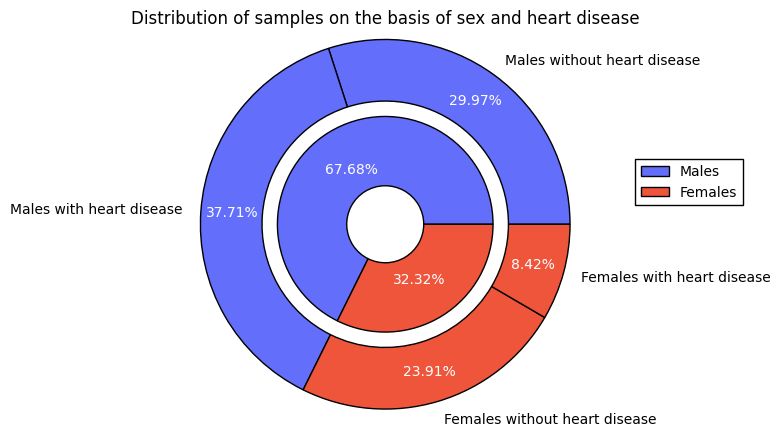

In [13]:
healthy_male_num = sex_num_crosstab.loc[1, 0]
unhealthy_male_num = sex_num_crosstab.loc[1, 1]
total_male_num = healthy_male_num + unhealthy_male_num

healthy_female_num = sex_num_crosstab.loc[0, 0]
unhealthy_female_num = sex_num_crosstab.loc[0, 1]
total_female_num = healthy_female_num + unhealthy_female_num

inner_values = [total_male_num, total_female_num]
inner_labels = ["Males", "Females"]
inner_colors = ["#636EFA", "#EF553B"]

outer_values = [healthy_male_num, unhealthy_male_num, healthy_female_num, unhealthy_female_num]
outer_labels = ["Males without heart disease", "Males with heart disease",
                "Females without heart disease", "Females with heart disease"]
outer_colors = ["#636EFA", "#636EFA", "#EF553B", "#EF553B"]

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(x=inner_values, colors=inner_colors, radius=0.7, autopct='%1.2f%%', pctdistance=0.6,
       wedgeprops=dict(edgecolor="black", width=0.45), textprops=dict(color="white"))

_, _, autotexts = ax.pie(x=outer_values, colors=outer_colors, radius=1.2, autopct='%1.2f%%', pctdistance=0.83,
                         wedgeprops=dict(edgecolor="black", width=0.4), labels=outer_labels)

for autotext in autotexts:
    autotext.set_color("white")

ax.set(aspect="equal", title="Distribution of samples on the basis of sex and heart disease");

ax.legend(inner_labels, loc=(1.15, 0.55), framealpha=1, fancybox=False, edgecolor="black");

The number of male samples in the dataset is almost twice the number of female samples. We also observe that only about a quarter of the female samples in the given dataset have heart disease, in contrast to the male samples where roughly half of them have heart disease. Let us now look at the age distribution of the male and female samples.

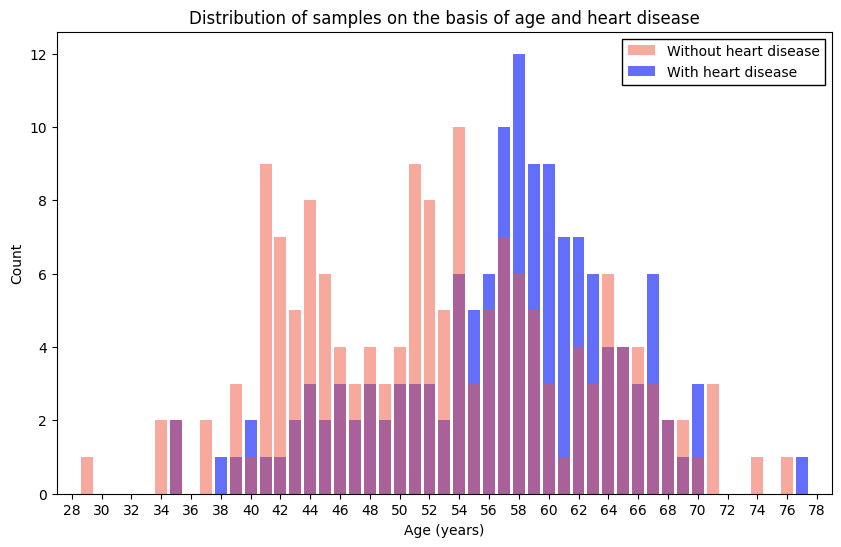

In [14]:
age_data_with_hd = heart_disease.loc[heart_disease["num"] == 1, "age"].value_counts()
age_data_without_hd = heart_disease.loc[heart_disease["num"] == 0, "age"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x=age_data_without_hd.index, height=age_data_without_hd.values,
       color="#EF553B", alpha=0.5, label="Without heart disease", zorder=1)

ax.bar(x=age_data_with_hd.index, height=age_data_with_hd.values,
       color="#636EFA", label="With heart disease", zorder=0)

ax.set(title="Distribution of samples on the basis of age and heart disease",
       xlabel="Age (years)", ylabel="Count", xlim=(27, 79), xticks=range(28, 80, 2))

ax.legend(fancybox=False, framealpha=1, edgecolor="black");

In the given dataset, the highest count of samples with heart disease corresponds to the age of 58 years. We can see that the number of samples suffering from heart disease is large for ages between 50 and 70 years. The mean age of male and female samples with and without heart disease is computed below:

In [15]:
pd.DataFrame(heart_disease.groupby(["sex", "num"])["age"].mean())

age
sex num           
0.0 0    54.577465
    1    59.080000
1.0 0    51.101124
    1    56.241071

On average, the age of a female sample is more than the age of a male sample, in both groups of samples (with heart disease and without heart disease). We shall proceed by analysing the relationship between the age and the maximum heart rate of the samples.

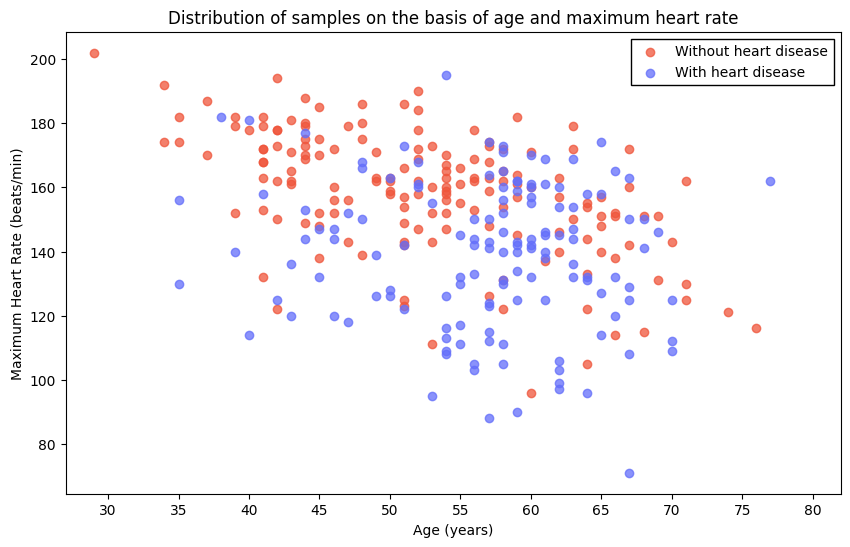

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x=heart_disease.loc[heart_disease["num"] == 0, "age"],
           y=heart_disease.loc[heart_disease["num"] == 0, "thalach"],
           c="#EF553B", alpha=0.75, label="Without heart disease")

ax.scatter(x=heart_disease.loc[heart_disease["num"] == 1, "age"],
           y=heart_disease.loc[heart_disease["num"] == 1, "thalach"],
           c="#636EFA", alpha=0.75, label="With heart disease")

ax.set(title="Distribution of samples on the basis of age and maximum heart rate",
       xlabel="Age (years)", xlim=(27, 82), xticks=range(30, 81, 5),
       ylabel="Maximum Heart Rate (beats/min)")

ax.legend(fancybox=False, framealpha=1, edgecolor="black");

The maximum heart rate of a sample decreases with the increase in age, irrespective of the existence of heart disease. The relationship between the mdeical attributes are easily seen with the help of the following correlation matrix:

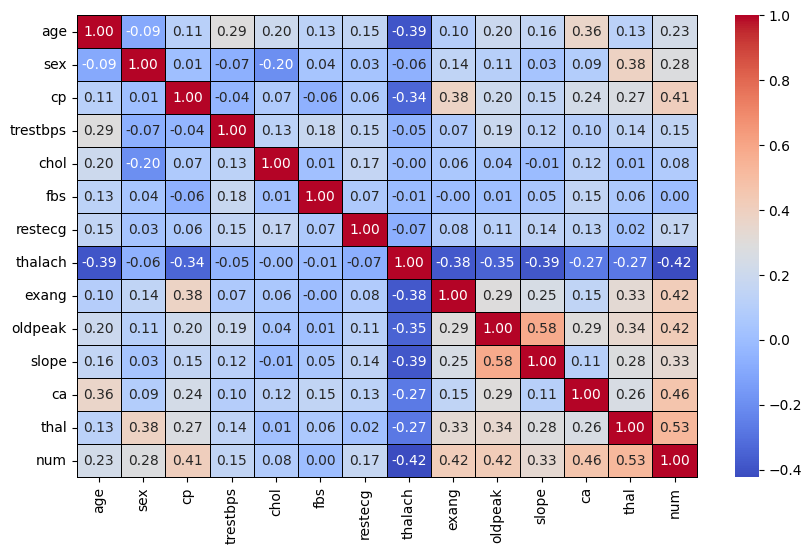

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(data=heart_disease.corr(), cmap="coolwarm", annot=True,
                 fmt=".2f", linewidth=0.5, linecolor="black", clip_on=False);

A high positive value implies a positive correlation and a high negative value implies a negative correlation.

## Supervised Machine Learning

The `num` attribute is the target (label) and the rest of the attributes are the features of the ML model. We shall split the data into features and target:

In [18]:
# features
X = heart_disease.drop("num", axis=1)

# labels
y = heart_disease["num"]

Split the data further, to obtain a test set for final evaluatation.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Let us look at the top 5 rows of `X_train`.

In [20]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
160,46.0,1.0,2.0,101.0,197.0,1.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0
91,62.0,0.0,4.0,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0
273,71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,2.0,0.0,3.0
158,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0
201,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0


The dimensions of the training and test sets are:

In [21]:
X_train.shape, X_test.shape

((222, 13), (75, 13))

We shall now perform feature scaling on the train and test sets using `StandardScalar`.

In [22]:
scalar = StandardScaler()

X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X.columns)

X_test = pd.DataFrame(scalar.transform(X_test), columns=X.columns)

The transformed `X_train` is of the following form:

In [23]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.920458,0.699952,-1.220039,-1.786162,-1.017973,2.236068,-0.968971,0.257142,-0.72149,-0.906432,-0.980373,-0.725126,1.098575
1,0.819546,-1.428669,0.855430,1.443874,-1.658997,-0.447214,1.041417,-0.227380,-0.72149,4.464267,2.220256,2.452071,1.098575
2,1.798298,-1.428669,0.855430,-1.183952,-1.950372,-0.447214,-0.968971,-1.108331,-0.72149,0.479555,0.619942,-0.725126,-0.942292
3,0.602045,0.699952,0.855430,0.348947,0.846824,-0.447214,1.041417,0.873807,-0.72149,0.133058,0.619942,1.393005,1.098575
4,1.037046,-1.428669,0.855430,2.538802,1.468422,-0.447214,-0.968971,0.169047,1.38602,-0.906432,-0.980373,-0.725126,-0.942292


Let us now create a dictionary of models to test their performance on the given data. To ensure the reproducibility of the results, we shall use the `random_state` parameter.

In [24]:
models_to_test_dict = {"SVC": SVC(random_state=0),
                       "LogisticRegression": LogisticRegression(random_state=0),
                       "RandomForestClassifier": RandomForestClassifier(random_state=0),
                       "XGBClassifier": XGBClassifier(random_state=0)}

accuracy = {}

In [25]:
for model_name, model in models_to_test_dict.items():
    accuracy[model_name] = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))

In [26]:
baseline_predictions = pd.DataFrame(accuracy, index=["Accuracy"]).T

baseline_predictions

,Accuracy
SVC,0.819596
LogisticRegression,0.842222
RandomForestClassifier,0.815354
XGBClassifier,0.810909


The baseline predictions are visualized below:

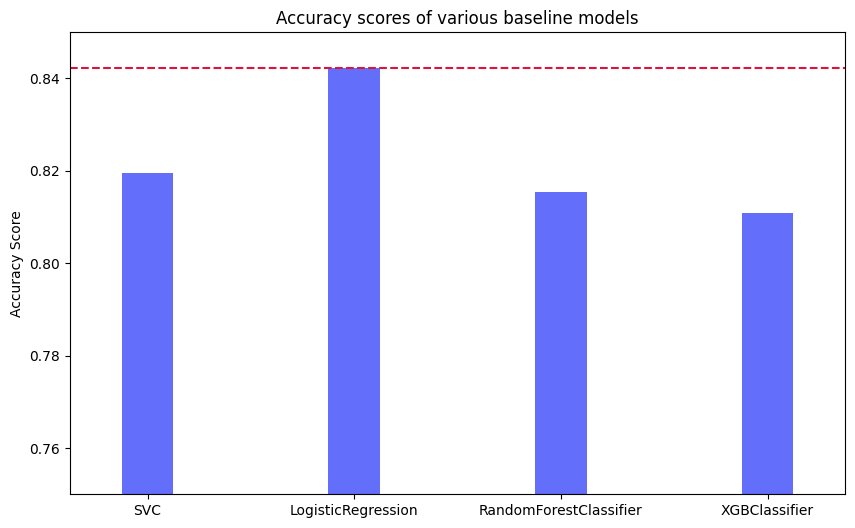

In [27]:
baseline_predictions.plot(kind="bar", figsize=(10, 6), color="#636EFA", ylim=(0.75, 0.85),
                          title="Accuracy scores of various baseline models",
                          rot=0, ylabel="Accuracy Score", width=0.25, legend=False)

plt.axhline(y=baseline_predictions["Accuracy"].max(), linestyle="--", color="crimson");

We observe that LogisticRegression model performs the best among all the chosen models in terms of accuracy. Let us now proceed with the LogisticRegression model and tune its hyperparameters. The parameters of the model are:

In [28]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

GridSearchCV can be used to find optimal values for the hyperparameters of the model. The values to test are given in the dictionary below:

In [29]:
parameter_test_values = {"solver": ["lbfgs", "liblinear"],
                         "C": np.logspace(-4, 4, 40)}

In [30]:
log_reg_model = GridSearchCV(estimator=LogisticRegression(random_state=0),
                             param_grid=parameter_test_values,
                             cv=5, verbose=True)

# fit the model on the train set.
log_reg_model.fit(X_train, y_train);

Fitting 5 folds for each of 80 candidates, totalling 400 fits


From all the possible combinations in `parameter_test_values`, the best values for the hyperparameters are:

In [31]:
log_reg_model.best_params_

{'C': 0.028942661247167517, 'solver': 'liblinear'}

Let us now compare the performance of the baseline model and the tuned model. 

In [32]:
tuned_model = LogisticRegression(random_state=0, **log_reg_model.best_params_)

baseline_model = LogisticRegression(random_state=0)

In [33]:
models_dict = {"Baseline Model": baseline_model, "Tuned Model": tuned_model}

score_parameters = ["Accuracy", "Precision", "Recall", "F1"]

scores_df = pd.DataFrame(index=models_dict.keys(), columns=score_parameters)

for model_name in models_dict:
    for param in score_parameters:
        scores_list = cross_val_score(models_dict[model_name], X_train, y_train, cv=5, scoring=param.lower())
        scores_df.loc[model_name, param] = np.mean(scores_list)
        
scores_df

,Accuracy,Precision,Recall,F1
Baseline Model,0.842222,0.850507,0.801429,0.820392
Tuned Model,0.851212,0.858574,0.811429,0.831257


Let's visualise the above model scores:

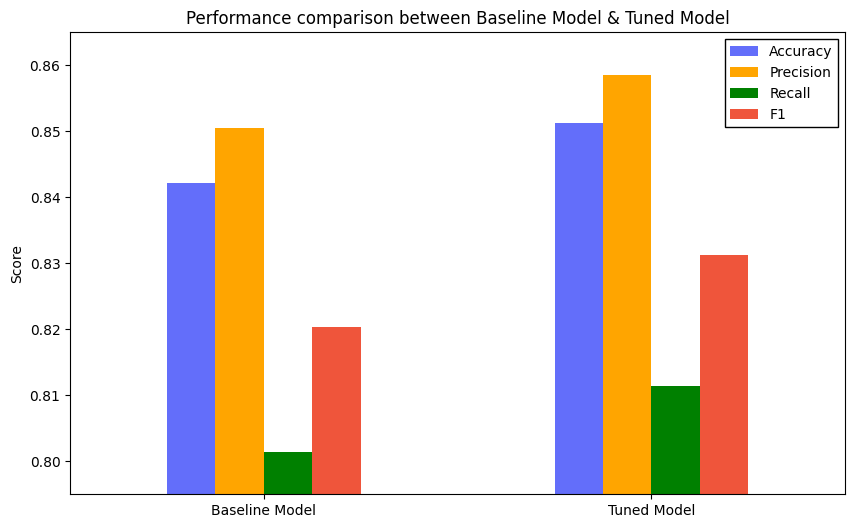

In [34]:
scores_df.plot(kind="bar", figsize=(10, 6), ylim=(0.795, 0.865), ylabel="Score",
               rot=0, color=["#636EFA", "orange", "green", "#EF553B"],
               title="Performance comparison between Baseline Model & Tuned Model")

plt.legend(fancybox=False, framealpha=1, edgecolor="black");

We shall now fit the tuned model and then make predictions on the test set.

In [35]:
tuned_model.fit(X_train, y_train)

y_pred = tuned_model.predict(X_test)

train_set_score = tuned_model.score(X_train, y_train)
test_set_score = tuned_model.score(X_test, y_test)

print(f"Accuracy of the tuned model's prediction on the train set: {train_set_score:.2%}")
print(f"Accuracy of the tuned model's prediction on the test set: {test_set_score:.2%}")

Accuracy of the tuned model's prediction on the train set: 85.59%
Accuracy of the tuned model's prediction on the test set: 85.33%


The associated confusion matrix is:

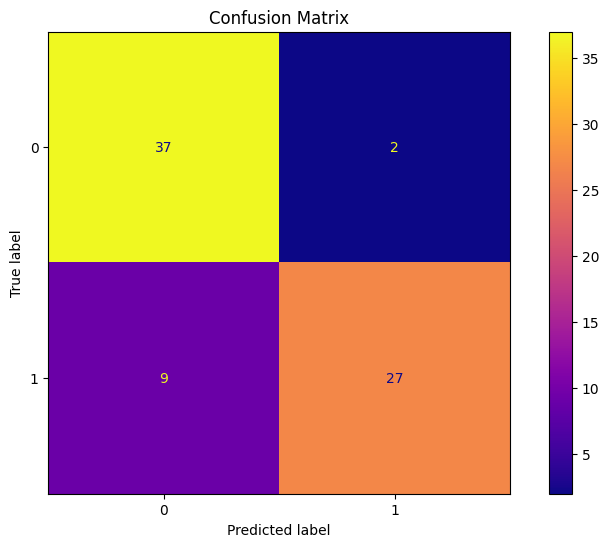

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="plasma", ax=ax);

The Receiver Operating Characteristic (ROC) curve and the value of the area under the curve (AUC) is shown below:

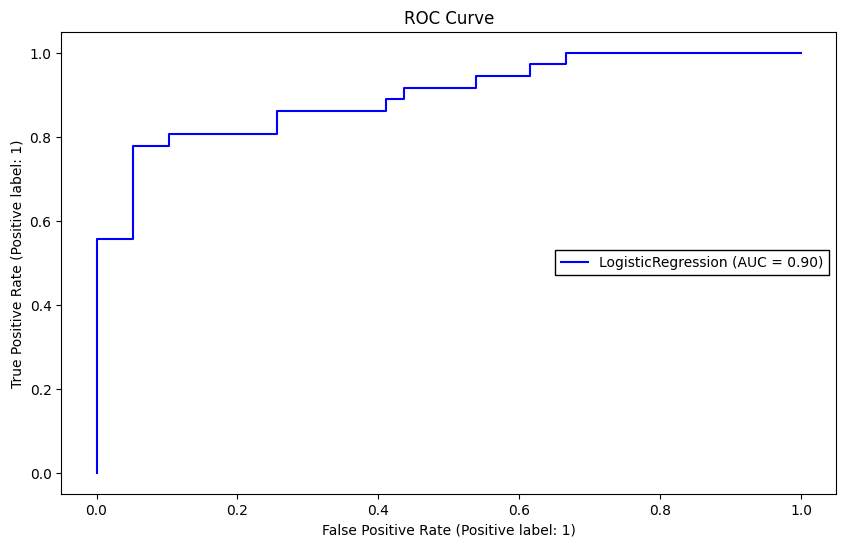

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("ROC Curve")

RocCurveDisplay.from_estimator(tuned_model, X_test, y_test, color="#0000FF", ax=ax);

plt.legend(loc="right", fancybox=False, framealpha=1, edgecolor="black");

Finally, we shall look at the corresponding classification report.

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        39
           1       0.93      0.75      0.83        36

    accuracy                           0.85        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.87      0.85      0.85        75



Let us now inspect the important features.

In [39]:
features_dict = dict(zip(X_train.columns, tuned_model.coef_[0]))

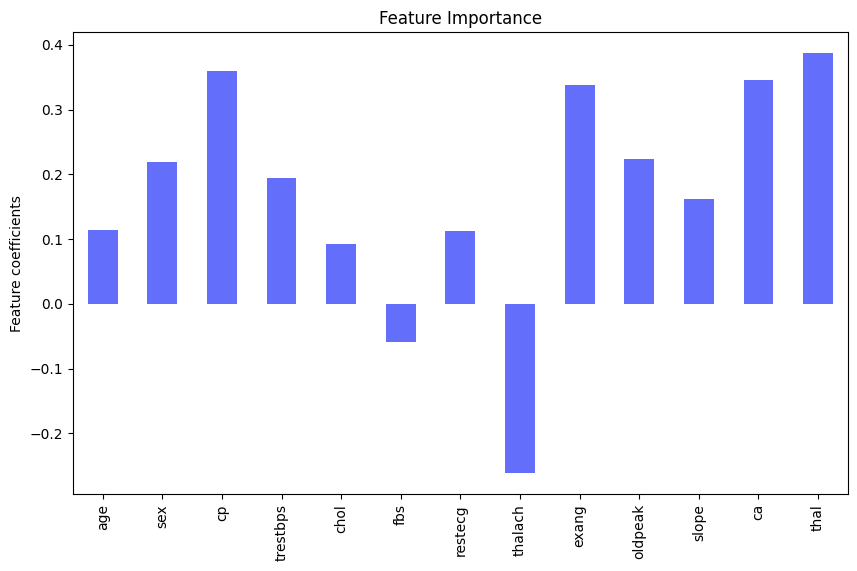

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set(title="Feature Importance", ylabel="Feature coefficients")

pd.DataFrame(features_dict, index=[0]).T.plot(kind="bar", color="#636EFA", legend=False, ax=ax);

By looking at the plot above, we observe that `cp`, `exang`, `ca` and `thal` attributes have a strong positive correlation with `num`, whereas `thalach` has a strong negative correlation with `num`. 